In [1]:
# Analysis of DataSet : Hospitalized patients with heart failure

#pip install missingno # To be installed if its not installed already

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.express as px
import random
from datetime import datetime
from pywaffle import Waffle
#to see plot directly intead giving plt.show()
%matplotlib inline
%reload_ext autoreload



In [2]:
df_HospitalDischarge = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name ='Hospitalization_Discharge')


In [3]:
df_CardiacComplication = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name = 'CardiacComplications')



In [4]:
df_Responsive = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name = 'Responsivenes')



In [5]:
df_PatientHistory = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name = 'PatientHistory')



In [6]:
df_Labs = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name = 'Labs')



In [7]:
df_Demography = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name = 'Demography')




In [8]:
df_Patientprescription = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name = 'Patient_Precriptions')



In [9]:
#Q1. How many patients were registered in each unique occupation?

df_Demography.groupby(['occupation'])['inpatient_number'].nunique()

#Additional
#df_Demography['occupation'].unique()
#for column in df_Demography:unique_values=df_Demography['occupation'].unique()
          

occupation
Officer             7
Others             89
UrbanResident    1670
farmer            198
worker             17
Name: inpatient_number, dtype: int64

In [10]:
# Additional Code
#df_Demography.groupby(["occupation"])["inpatient_number"].count()

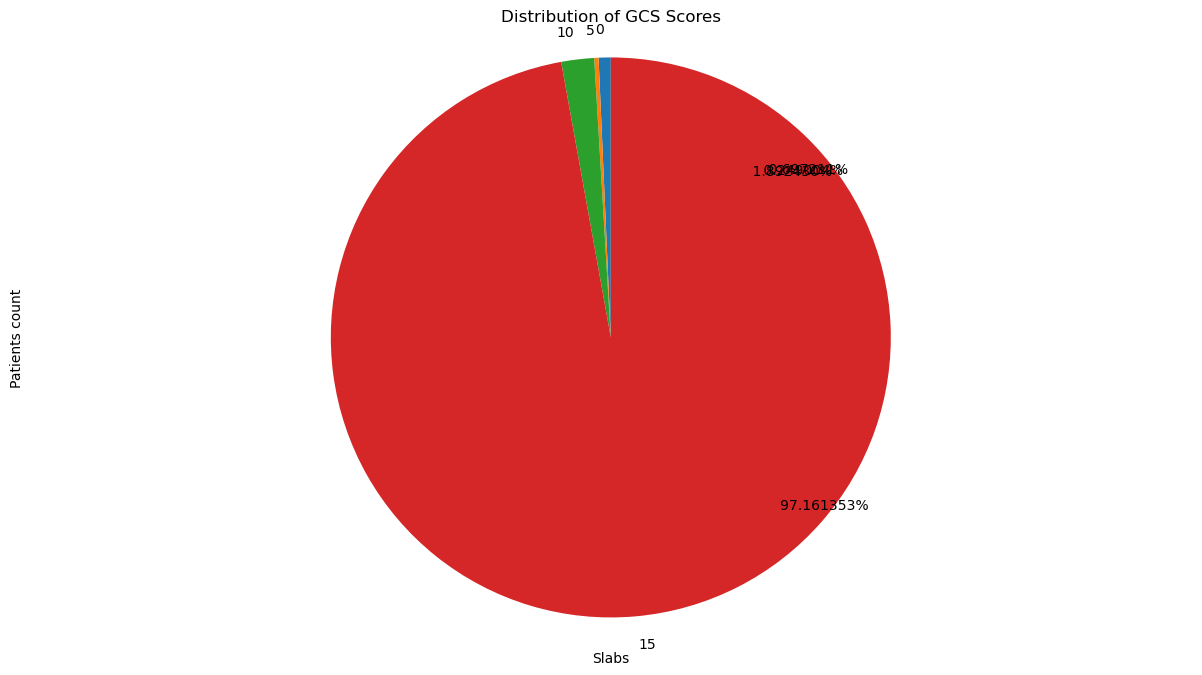

In [11]:
#Q2. Divide GCS scores into slabs of 5 and count the number of patients under each band of score.Show this as any graph of your choice.

gcs = df_Responsive['GCS']
slabs = range(0, 16, 5)
slab_counts = {slab: 0 for slab in slabs}
for gcs in gcs:
    for slab in slab_counts:
        if gcs >= slab and gcs < slab + 5:
            slab_counts[slab] += 1
plt.figure(figsize=(15,8))
plt.pie(list(slab_counts.values()), labels=list(slab_counts.keys()), autopct='%100f%%', startangle=90)
#plt.bar(list(slab_counts.values()), labels=list(slab_counts.keys()), autopct='%100f%%',height=10)
plt.axis('equal')
plt.xlabel('Slabs')
plt.ylabel('Patients count')
plt.title('Distribution of GCS Scores')
plt.show()

In [12]:
#Q3. Add a Calculated Column called Discharge date into the Hospitalization_Discharge using the information already available to you.

df_HospitalDischarge['discharge_date'] =  pd.to_datetime(df_HospitalDischarge['Admission_date']) +  pd.to_timedelta(np.ceil(df_HospitalDischarge['dischargeDay']), unit="D")
print("Data frame after adding discharge date")
df_HospitalDischarge


Data frame after adding discharge date


,inpatient_number,DestinationDischarge,admission_ward,admission_way,discharge_department,visit_times,respiratory_support,oxygen_inhalation,dischargeDay,Admission_date,...,re_admission_within_28_days,death_within_3_months,re_admission_within_3_months,death_within_6_months,re_admission_within_6_months,time_of_death__days_from_admission,readmission_time_days_from_admission,return_to_emergency_department_within_6_months,time_to_emergency_department_within_6_months,discharge_date
0,857781,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,11,2017-01-24,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2017-02-04
1,743087,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,8,2017-05-05,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2017-05-13
2,866418,Home,Cardiology,NonEmergency,Cardiology,2,NaN,OxygenTherapy,5,2016-11-18,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2016-11-23
3,775928,Home,Cardiology,Emergency,Cardiology,1,NaN,OxygenTherapy,11,2017-10-02,...,1,0,1,0,1,NaN,19.0,1.0,19.0,2017-10-13
4,810128,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,5,2019-11-17,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2019-11-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,740689,HealthcareFacility,GeneralWard,Emergency,GeneralWard,1,NaN,OxygenTherapy,5,2016-02-07,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2016-02-12
2004,734280,HealthcareFacility,GeneralWard,Emergency,GeneralWard,1,NaN,OxygenTherapy,8,2017-03-29,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2017-04-06
2005,781004,HealthcareFacility,Cardiology,Emergency,Cardiology,1,NaN,OxygenTherapy,14,2018-01-22,...,0,0,1,0,1,NaN,76.0,1.0,76.0,2018-02-05
2006,744870,Unknown,Cardiology,NonEmergency,Cardiology,1,IMV,OxygenTherapy,1,2019-11-27,...,0,1,0,1,0,1.0,NaN,0.0,NaN,2019-11-28


In [13]:
#Q4. What percentage of patients had biventricular heart failure?

bi_failure_count = df_CardiacComplication['type_of_heart_failure'].value_counts()['Both']
total_count = df_CardiacComplication['type_of_heart_failure'].count()
print("Percentage of Biventricular heart failures: ", round((bi_failure_count/total_count) * 100, 2))


Percentage of Biventricular heart failures:  73.71


In [14]:
#Q5. What is the ratio of patients who were responsive to pain vs responsive to sound?


import math
df_Responsive['GCS']
sound_Count = df_Responsive['consciousness'].value_counts()['ResponsiveToSound']
pain_Count = df_Responsive['consciousness'].value_counts()['ResponsiveToPain']
divisor = math.gcd(pain_Count, sound_Count)

print('Ratio')
Ratio=print(f"{round(pain_Count/divisor)}:{round(sound_Count/divisor)}")


Ratio
4:19


In [15]:
#Q6. What was the average age group of the patients that had an outcome of 'Alive'?

#Merge Hospital Discharge and Demography
df_HospitalDischarge_Demography = df_HospitalDischarge.merge(df_Demography, how = 'inner', on = 'inpatient_number')
df_HospitalDischarge_Demography_Alive = df_HospitalDischarge_Demography[df_HospitalDischarge_Demography['outcome_during_hospitalization'] == 'Alive']
splitted_age_catsplitted_age_cat = df_HospitalDischarge_Demography_Alive['ageCat'].str.split('-')
splitted_age_catsplitted_age_cat.explode()

print("Average age with Alive outcome is:", int(np.average(list(map(int, splitted_age_catsplitted_age_cat.explode())))))


Average age with Alive outcome is: 74


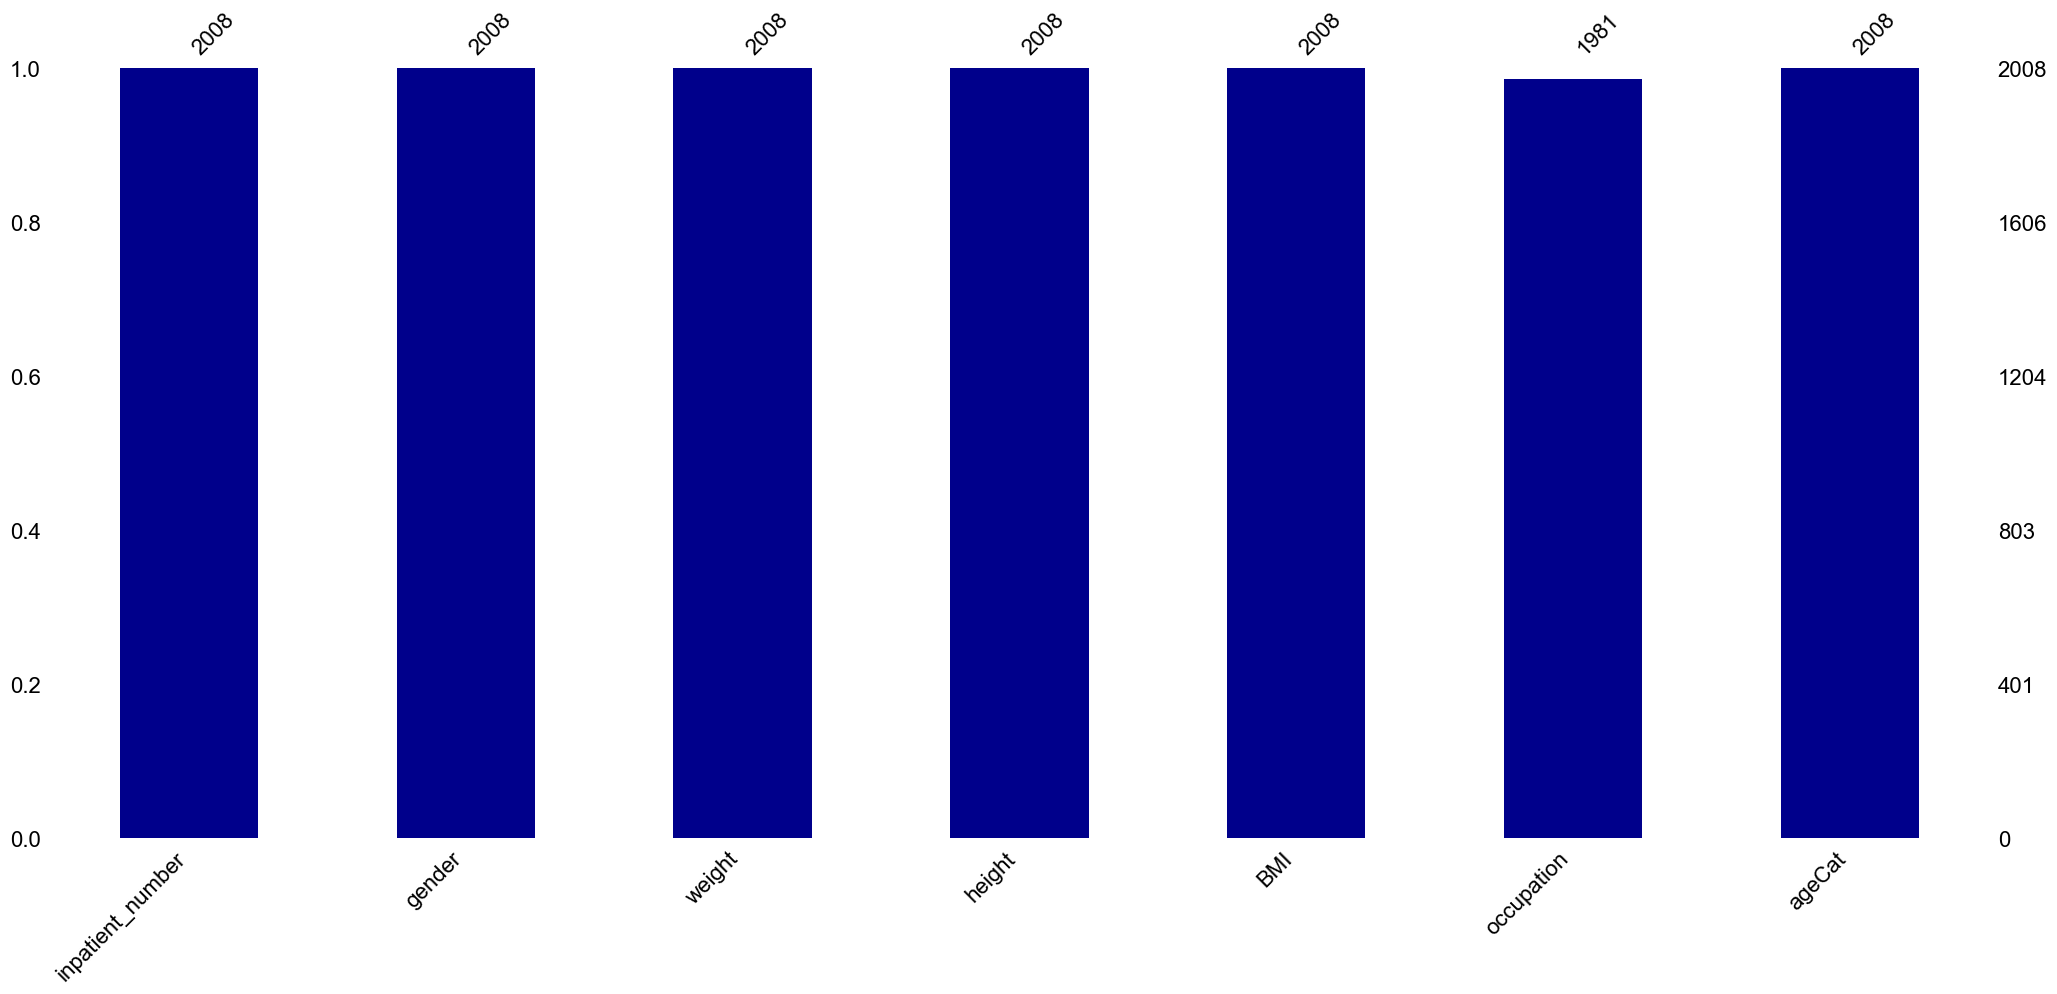

<Figure size 800x500 with 0 Axes>

In [16]:
#Q7. Visualize missing data and missing patterns from demography table using the "Missing No" Library

import random
colors_list = ["green","yellow","black","darkblue","pink"]
msno.bar(df_Demography, color = random.choice(colors_list))
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.set(rc={'axes.facecolor':'lightblue','figure.facecolor':'lightgreen'})




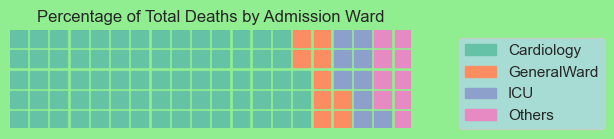

In [17]:
#Q8. Create a Waffle Chart to show what the percentage of total deaths belong to each admission_ward?

# Grouping by admission ward and calculating percentage of deaths
df_dead_patients = df_HospitalDischarge[df_HospitalDischarge['outcome_during_hospitalization'] == 'Dead']
total_dead_patients_count = len(df_dead_patients.index)
deaths_grouped_by_ward = df_dead_patients.groupby('admission_ward', as_index = False)['inpatient_number'].count()
deaths_grouped_by_ward = deaths_grouped_by_ward.rename(columns={'inpatient_number': 'death_count'})
deaths_grouped_by_ward['percentage'] = round(deaths_grouped_by_ward['death_count']/total_dead_patients_count* 100, 2)
deaths_grouped_by_ward['percentage']
#Plot waffle chart

fig = plt.figure(
    FigureClass = Waffle,
    rows = 5,
    values = deaths_grouped_by_ward['percentage'],
    labels = list(deaths_grouped_by_ward['admission_ward']),
    legend = {'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.title('Percentage of Total Deaths by Admission Ward')
plt.show()

In [18]:
deaths_grouped_by_ward['percentage']

0    72.73
1     9.09
2     9.09
3     9.09
Name: percentage, dtype: float64

In [19]:
#Q9. Create any 2 2-D arrays and perform matrix multiplication.Display the resulting array

#creating first array

arr1=np.array([[1,2,],[3,4]])
print(arr1)
print(arr1.ndim)

#creating second array

arr2=np.array([[5,6],[7,8]])
print(arr2)
print(arr2.ndim)

#Matrix Multiplying two arrays
print("Output:")
arr1=np.array([[1,2,],[3,4]])
arr2=np.array([[5,6],[7,8]])
arr=np.dot(arr1,arr2)
print(arr)

[[1 2]
 [3 4]]
2
[[5 6]
 [7 8]]
2
Output:
[[19 22]
 [43 50]]


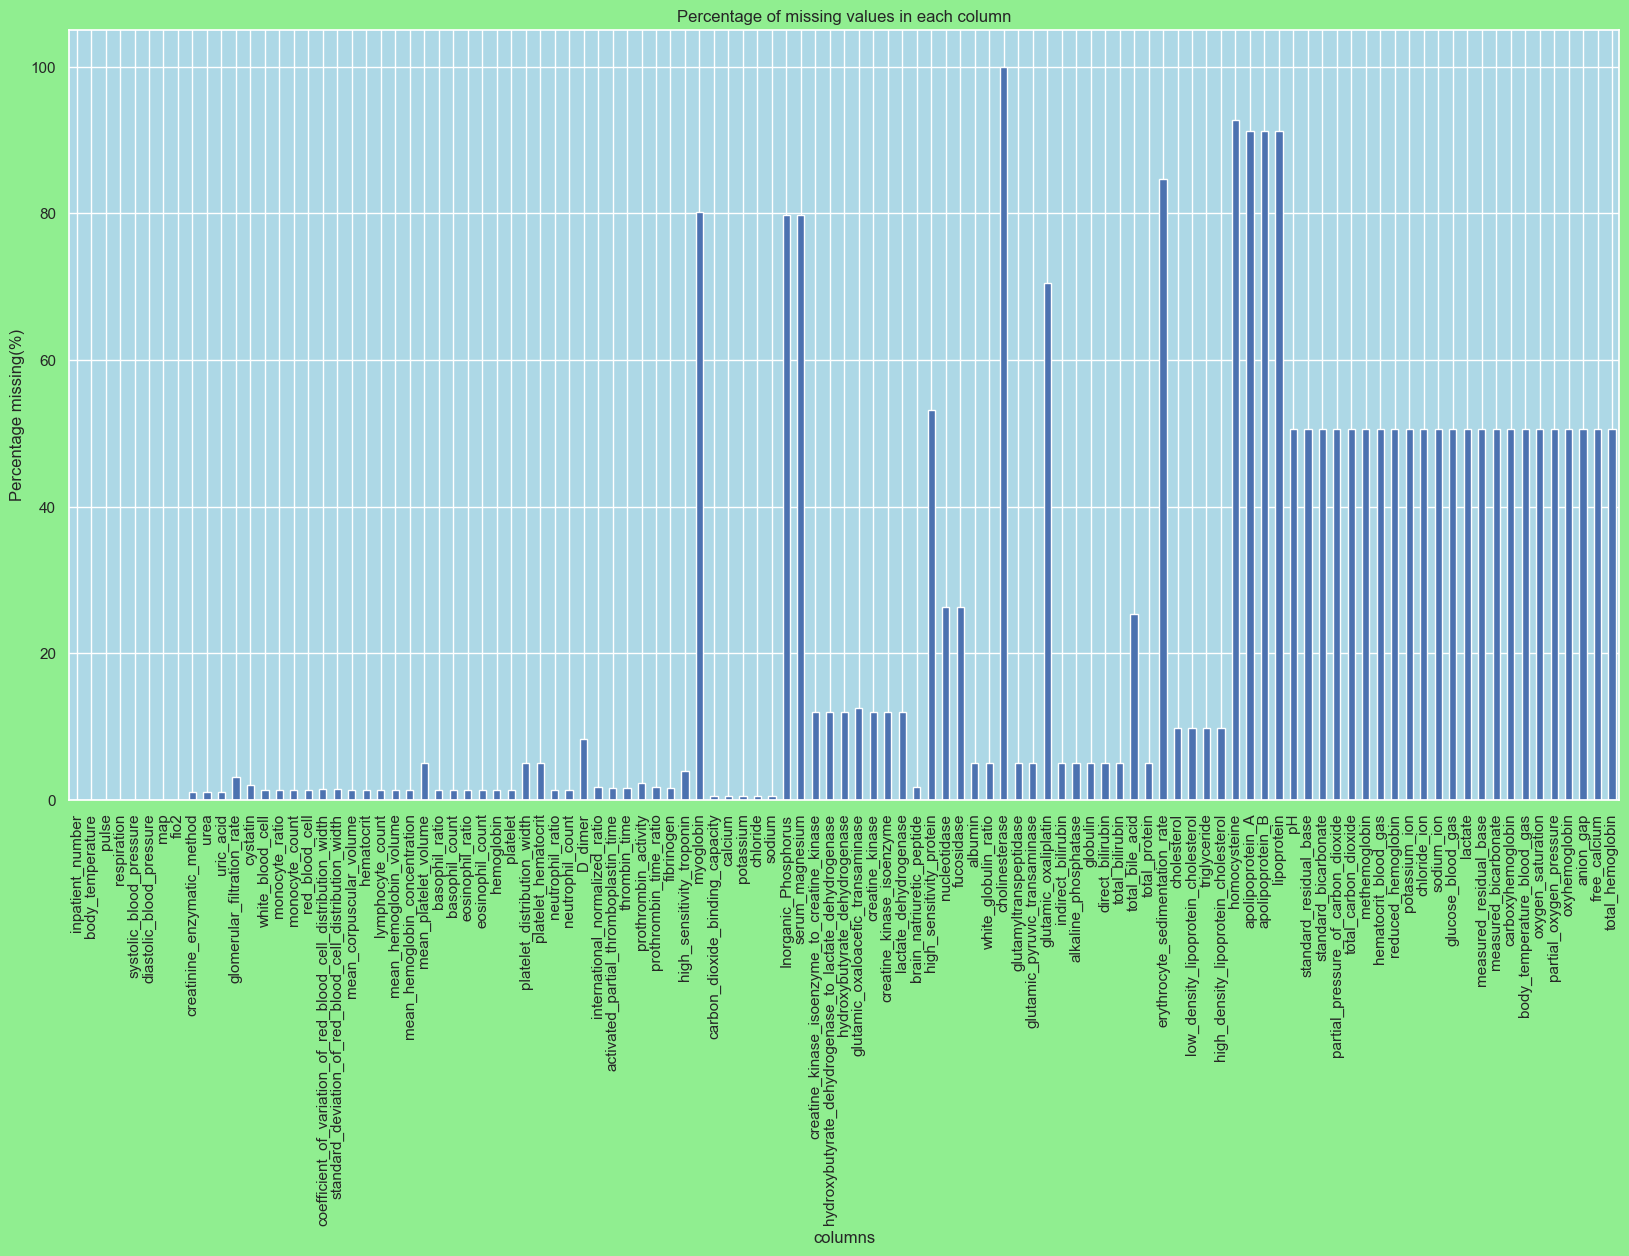

In [20]:
# Q10. Display percentage of missing values in each column in the table labs. show the distribution as a bar graph

missing_values_percentages=df_Labs.isnull().mean()*100
plt.figure(figsize=(20,10))
missing_values_percentages.plot(kind='bar')
plt.title('Percentage of missing values in each column')
plt.xlabel('columns')
plt.ylabel('Percentage missing(%)')
plt.show()
sns.set_style('darkgrid')
sns.set(rc={'axes.facecolor':'lightpink','figure.facecolor':'lightblue'})

In [21]:
#Q11. To find valid phone no or not

import re
mobile_arr = ['2','9587456281','1252478965','7397260044']
pattern = re.compile(r"^[789]\d{9}")
for number in mobile_arr:
   matched = bool(re.search(pattern, number))
   if matched:
    print(number, "YES")
   else:
    print(number, "NO")


2 NO
9587456281 YES
1252478965 NO
7397260044 YES


In [22]:
#Q12. If left ventricular end diastolic diameter has a normal range: 3.5 - 5.6 cm, how many patients fall outside that limit and what is the MAP of most patients with this condition?

df_CardiacComplication_copy = df_CardiacComplication.copy()
total_patients = df_CardiacComplication['inpatient_number'].count()
patients_inside_range = df_CardiacComplication[df_CardiacComplication['left_ventricular_end_diastolic_diameter_LV'].between(3.5, 5.6)]
#Find patients outside range
df_CardiacComplication_copy[~df_CardiacComplication_copy.apply(tuple,1).isin(patients_inside_range.apply(tuple,1))]

print("Total patients outside range of 3.5 and 5.6: ", df_CardiacComplication_copy['inpatient_number'].count())
#merge CardiacComplication with labs data for matching patients outside range
df_CardiacComplication_Labs_merge = df_CardiacComplication_copy.merge(df_Labs, how = 'inner', on = 'inpatient_number')
#aggregate map value and find value for most patients 
df_map_count = df_CardiacComplication_Labs_merge.groupby(['map'])['map'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(1)
print("MAP of most patients with this condition is:", df_map_count['map'].to_string(index=False))


Total patients outside range of 3.5 and 5.6:  2008
MAP of most patients with this condition is: 96.666667


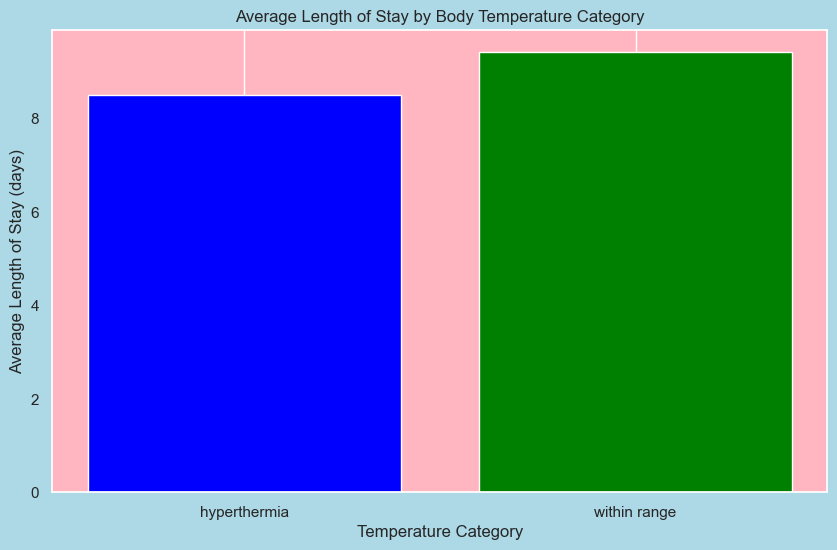

In [23]:
#Q13. Create a bar chart between length of stay and body temperature,classified as:hypothermia,within range or hyperthermia


df_HospitalDischarge_Labs_Merge=df_HospitalDischarge.merge(df_Labs, how = 'inner', on = 'inpatient_number')

df_HospitalDischarge_Labs_Merge['temp_category'] = df_HospitalDischarge_Labs_Merge['body_temperature'].apply(lambda x: 'hypothermia' if x < 35 else 'hyperthermia' if  x > 38.5 else 'within range')
df_HospitalDischarge_Labs_Merge[['dischargeDay','body_temperature','temp_category']]

df_HospitalDischarge_Labs_Merge = df_HospitalDischarge_Labs_Merge.rename(columns={'dischargeDay': 'LengthOfStay'})
df_Grouped = df_HospitalDischarge_Labs_Merge.groupby('temp_category').mean(numeric_only=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_Grouped.index, df_Grouped['LengthOfStay'], color=['blue', 'green', 'red'])
plt.ylabel('Average Length of Stay (days)')
plt.xlabel('Temperature Category')
plt.grid(axis='y')
plt.title('Average Length of Stay by Body Temperature Category')
plt.show()


In [24]:
#Q14. Find the list of patients whose discharge day is greater than the value given by the user.

userInputDays = int(input("Provide discharge days"))

discharge_day_array = df_HospitalDischarge[df_HospitalDischarge['dischargeDay'] > userInputDays]
discharge_day_array[['inpatient_number','dischargeDay']]

Provide discharge days 3


,inpatient_number,dischargeDay
0,857781,11
1,743087,8
2,866418,5
3,775928,11
4,810128,5
...,...,...
2002,754589,8
2003,740689,5
2004,734280,8
2005,781004,14


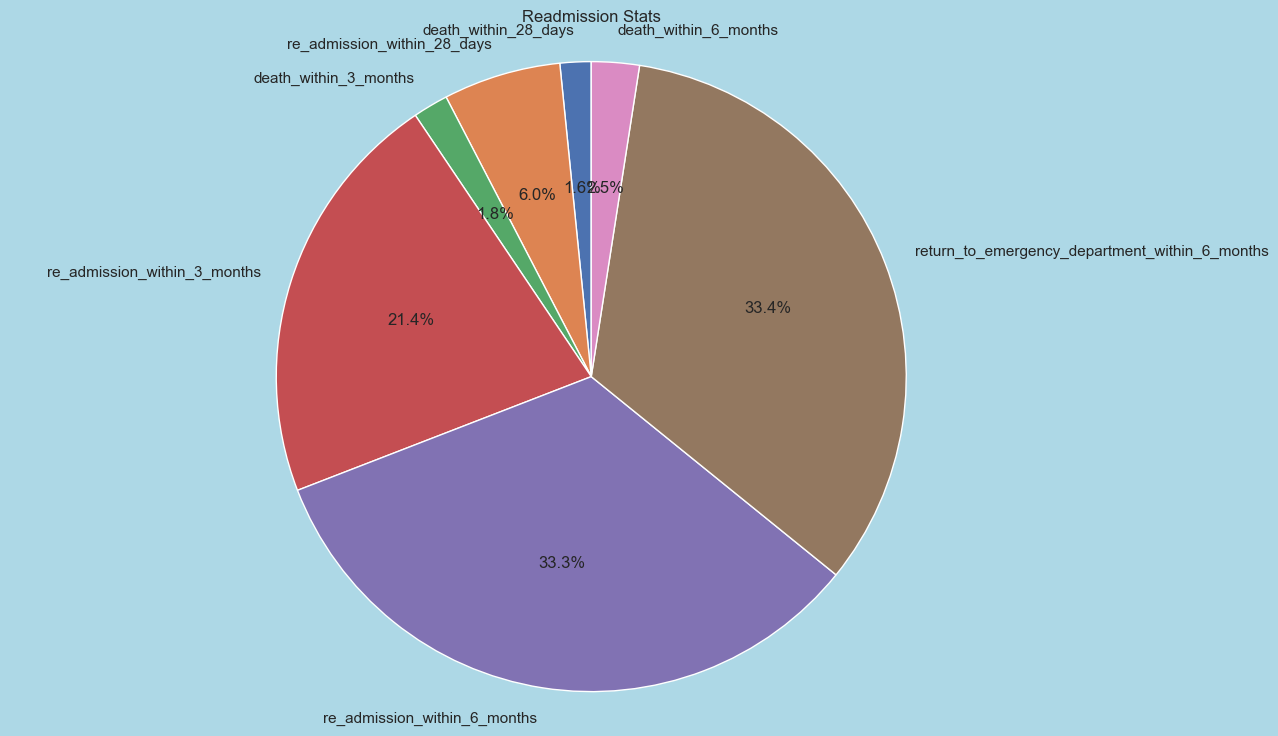

In [25]:
#Q15. Display a pie chart of number of patients in each cateory listed.

death_within_28_days_count = (df_HospitalDischarge['death_within_28_days'] == 1).sum()
re_admission_within_28_days_count = (df_HospitalDischarge['re_admission_within_28_days'] == 1).sum()
death_within_3_months_count= (df_HospitalDischarge['death_within_3_months'] == 1).sum()
re_admission_within_3_months_count = (df_HospitalDischarge['re_admission_within_3_months'] == 1).sum()
re_admission_within_6_months_count = (df_HospitalDischarge['re_admission_within_6_months'] == 1).sum()
death_within_6_months_count = (df_HospitalDischarge['death_within_6_months'] == 1).sum()
return_to_emergency_department_within_6_months_count = (df_HospitalDischarge['return_to_emergency_department_within_6_months'] == 1).sum()
df_Admission_Category_Counts = {'death_within_28_days': death_within_28_days_count, 
                                             're_admission_within_28_days' : re_admission_within_28_days_count,
                                            'death_within_3_months' : death_within_3_months_count,
                                            're_admission_within_3_months' : re_admission_within_3_months_count,
                                            're_admission_within_6_months' : re_admission_within_6_months_count,
                                            'return_to_emergency_department_within_6_months' : return_to_emergency_department_within_6_months_count,
                                            'death_within_6_months': death_within_6_months_count}
plt.figure(figsize=(15,9))
plt.pie(list(df_Admission_Category_Counts.values()), labels=list(df_Admission_Category_Counts.keys()), autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Readmission Stats')
plt.show()

In [26]:
#Q16. Create a pivot table with myocardial_infarction, congestive_heart_failure,peripheral_vascular_disease as rows and average Uric Acid and BMI as columns, using melt functions

df_merged_CardiacComplication_Demography = pd.merge(df_CardiacComplication,df_Demography, on='inpatient_number')
df_merged_CardiacComplication_Demography
df_merged_CardiacComplication_Demography_Labs = pd.merge(df_merged_CardiacComplication_Demography,df_Labs, on='inpatient_number')
df_with_required_data = df_merged_CardiacComplication_Demography_Labs[['myocardial_infarction', 'congestive_heart_failure', 'peripheral_vascular_disease', 'uric_acid', 'BMI']]


# Melt the data for required rows by filtering with only valid condition, 0 value for each condition is replaced to nan and filtered
df_melted = pd.melt(df_with_required_data.replace(0, np.nan), id_vars=['uric_acid', 'BMI'],
                     value_vars=['myocardial_infarction', 'congestive_heart_failure', 'peripheral_vascular_disease'],
                     var_name='Heart Condition', value_name='Value').dropna()

pivot_table = df_melted.groupby('Heart Condition').agg({'uric_acid': 'mean', 'BMI': 'mean'})

print("Pivot table using melt function:")
print(pivot_table)

Pivot table using melt function:
                              uric_acid        BMI
Heart Condition                                   
congestive_heart_failure     482.416576  21.843185
myocardial_infarction        507.913669  21.762637
peripheral_vascular_disease  489.282828  22.714252
